1. Primero toca convertir la imagen en blanco y negro
2. Despues se puede contrastar con la real (https://www.electroschematics.com/pcb-defects-detection-opencv/)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f26c506e6a0>,
 Text(0.5, 1.0, 'Imagen'))

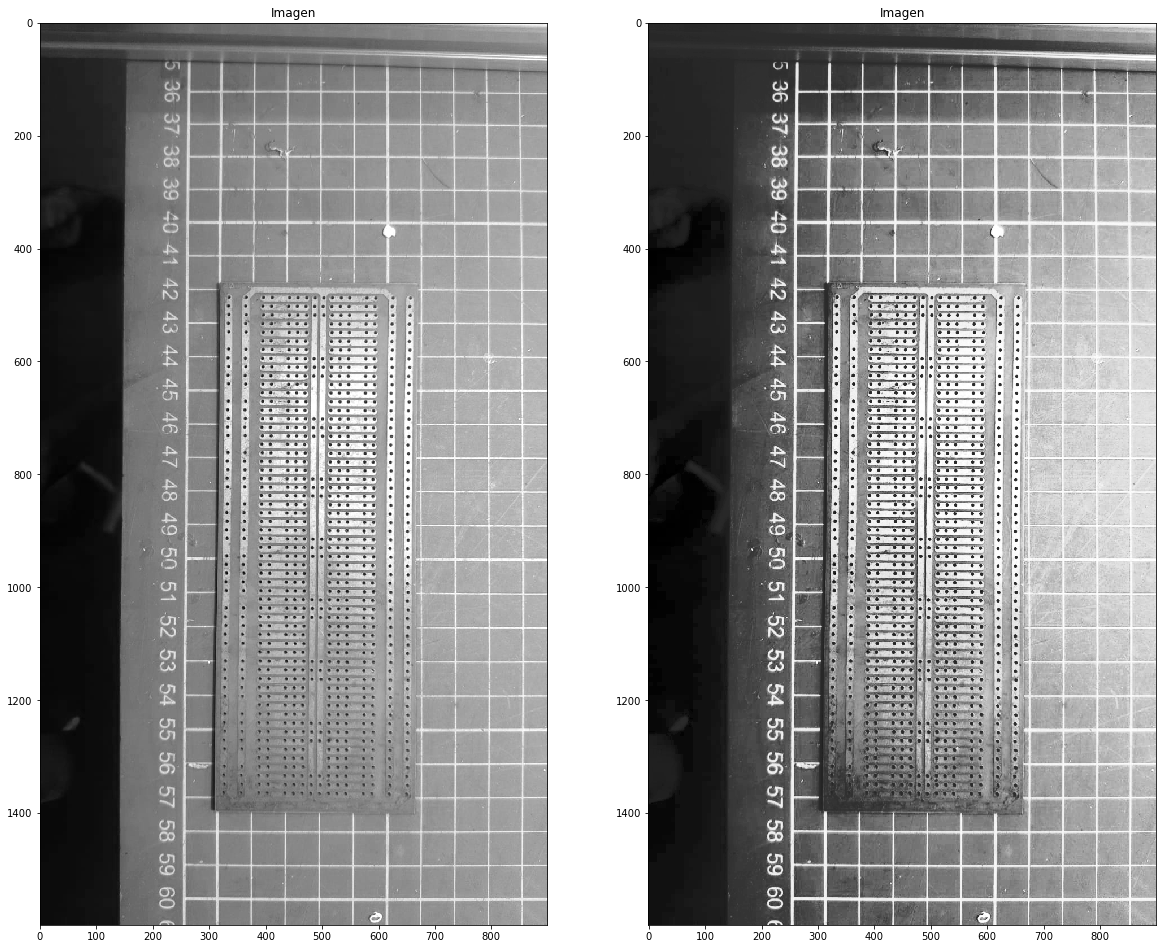

In [1]:
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

# SE CARGA LA IMAGEN EN ESCALA DE GRISES
img = cv2.imread("./TestPics/PCB11.jpg",1)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)



equ = cv2.equalizeHist(hsv[:,:,2])

plt.figure(1,figsize=(20, 20))
plt.subplot(121), plt.imshow(hsv[:,:,2], cmap='gray'), plt.title('Imagen')
plt.subplot(122), plt.imshow(equ, cmap='gray'), plt.title('Imagen')

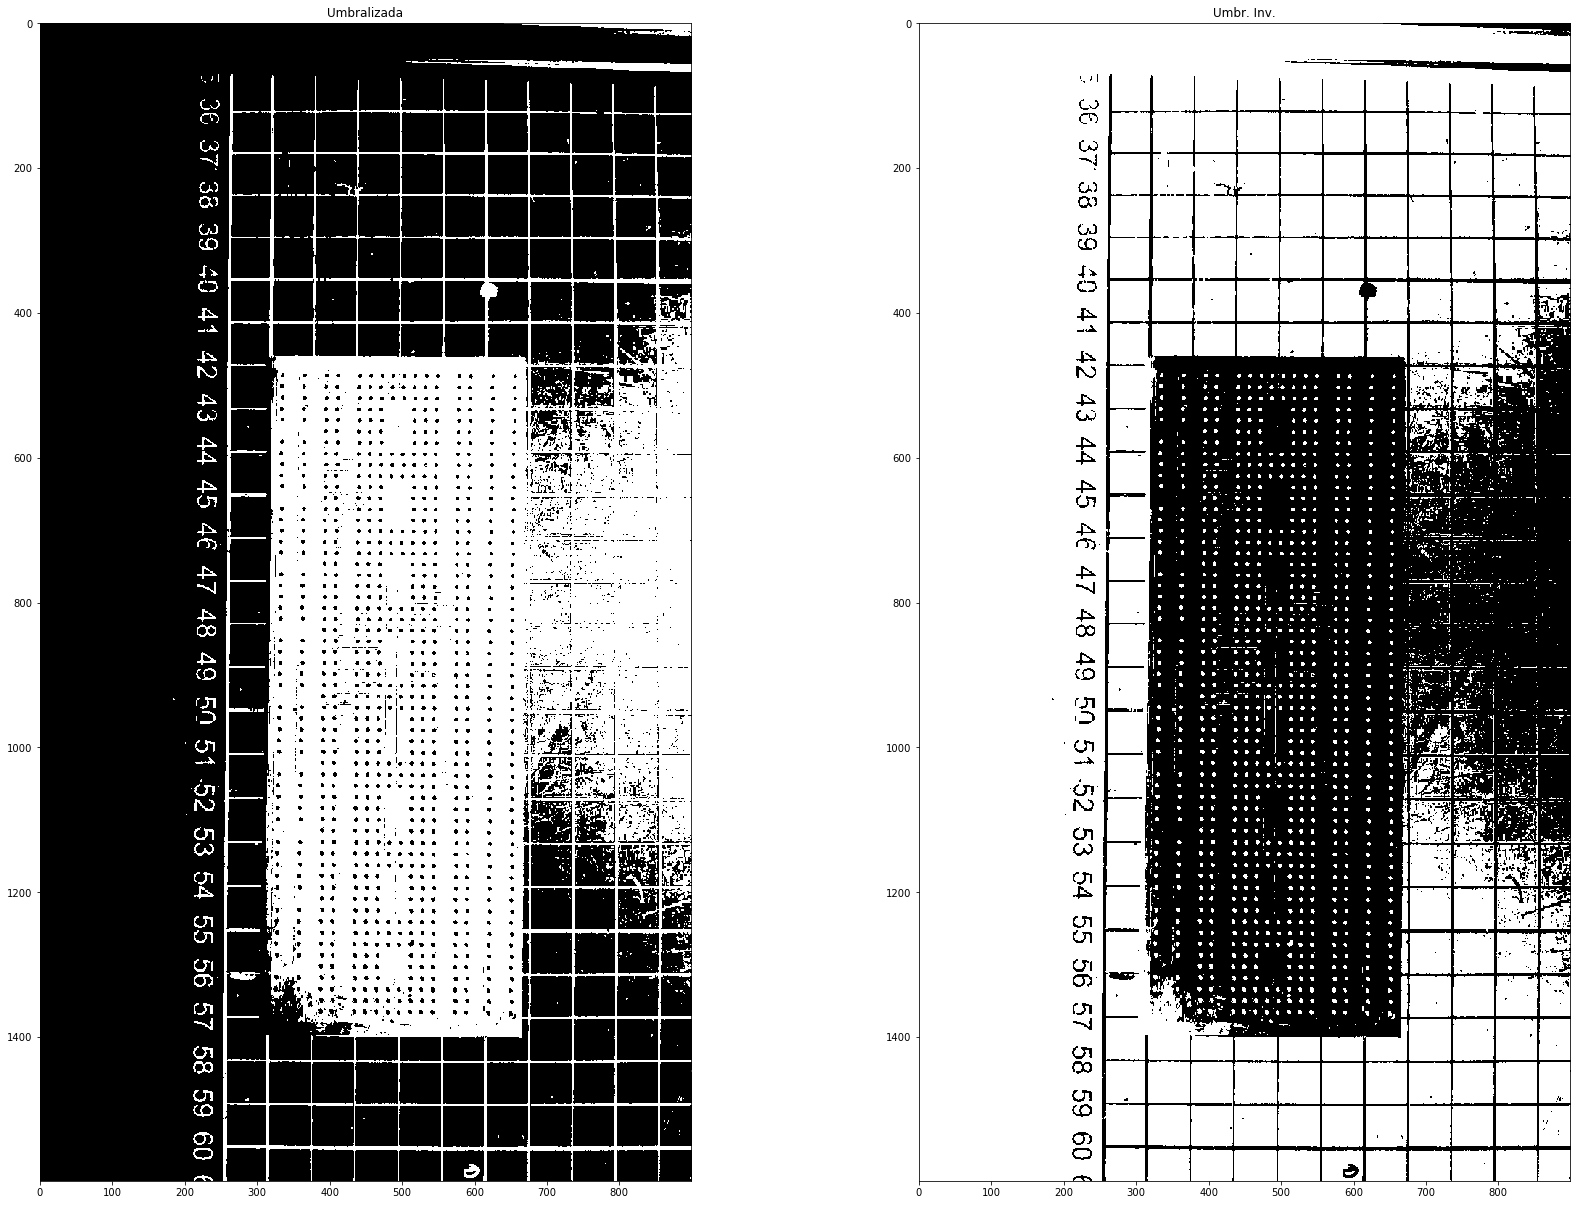

In [2]:
# UMBRALIZACION DE UNA IMAGEN

# SE CARGAN LAS IMAGENES 
img1 = cv2.imread("./TestPics/PCB11.jpg",0)

width, height = img1.shape[:2]
img_umbral = np.zeros((width,height), np.uint8)
img_umbral_inv = np.zeros((width,height), np.uint8)

#DIVISION POR UNA CONSTANTE
C=5 #Valor de la constante
IGMax=0
IGmin=1000000

#DIVISION POR UNA CONSTANTE
H=116 #Valor de la constante

for i in range(width):
    for j in range(height):
        if img1[i,j] < H : 
            img_umbral[i,j] = 0
            img_umbral_inv[i,j] = 255
        else : 
            img_umbral[i,j] = 255
            img_umbral_inv[i,j] = 0
        if img1[i,j] > IGMax: IGMax = img1[i,j]
        if img1[i,j] < IGmin: IGmin = img1[i,j]


#Visualizacion resulatado 
plt.figure(1,figsize=(25, 25))
plt.subplot(121), plt.imshow(img_umbral, cmap='gray'), plt.title('Umbralizada')
plt.subplot(122), plt.imshow(img_umbral_inv, cmap='gray'), plt.title('Umbr. Inv.')

# Adjust the subplot layout, because the logit one may take more space
# than usual, due to labels 
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.show()

Adaptive treshold (gaussian)
Otsu's method


(<matplotlib.axes._subplots.AxesSubplot at 0x7f26c053c220>,
 Text(0.5, 1.0, 'Umbr. Inv.'))

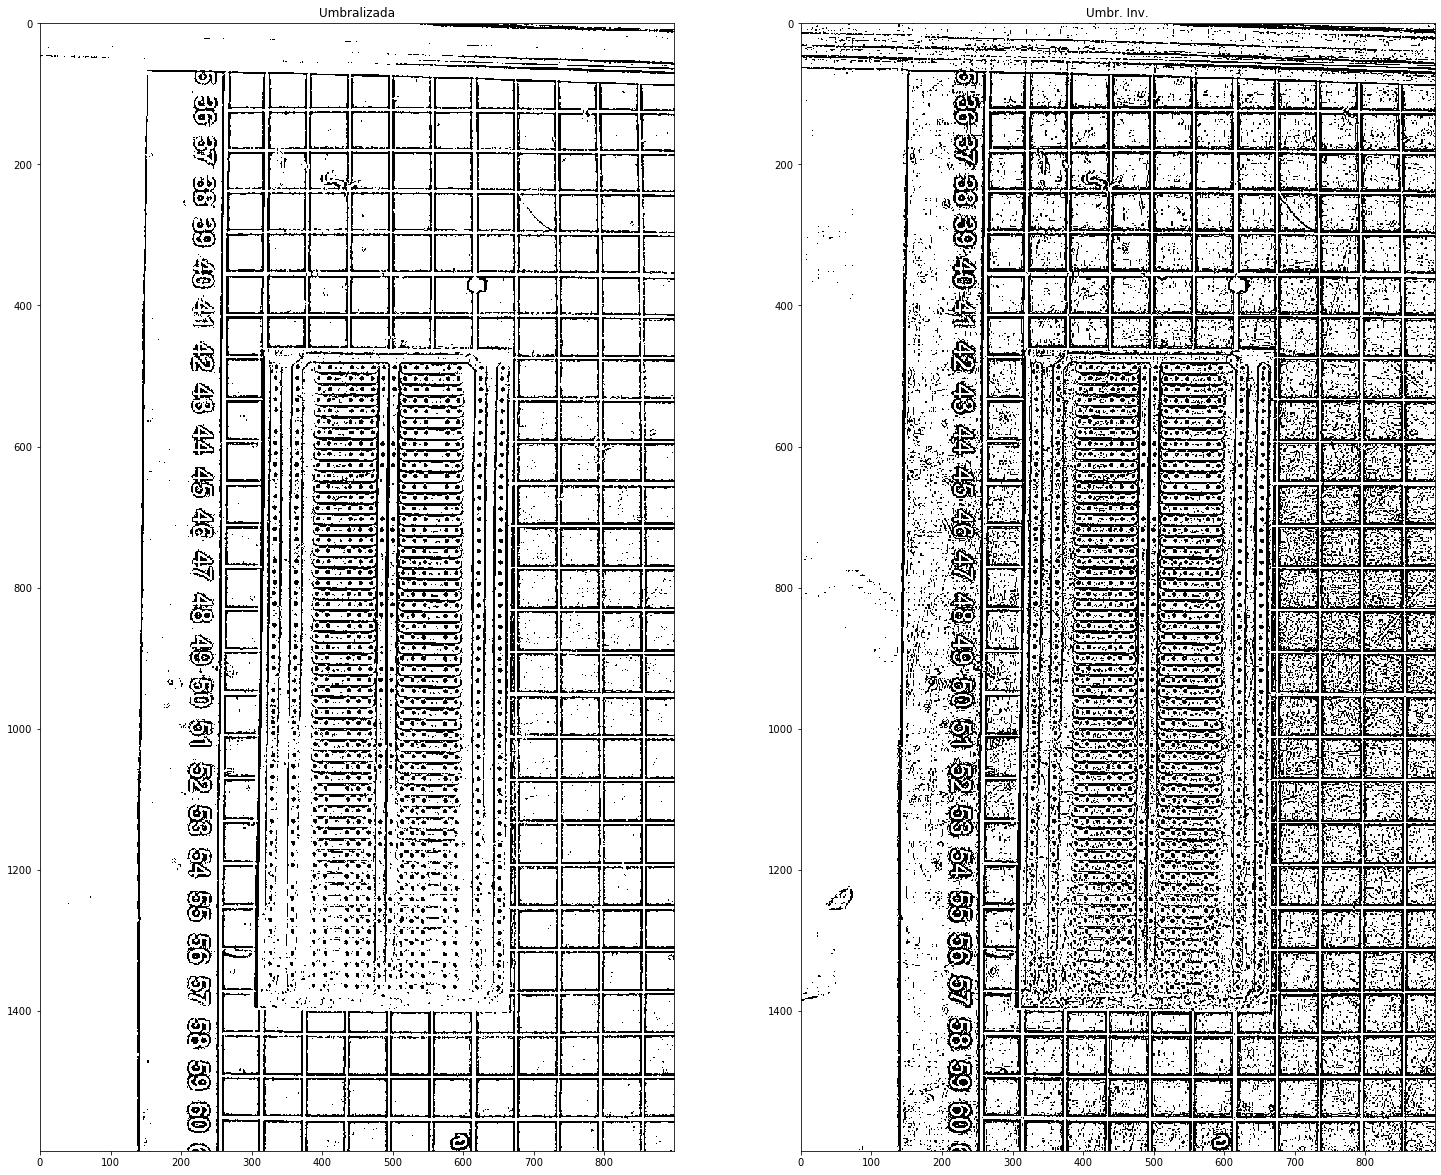

In [3]:
#Adaptative thersholding
# SE CARGAN LAS IMAGENES 
img2 = cv2.imread("./TestPics/PCB11.jpg",0)
img2 = cv2.medianBlur(img2,1)

th2 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,9,8)
#Gaussiano
th3 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

nlbw = cv2.medianBlur(th2, 7)

blur = cv2.GaussianBlur(img2,(1,1),0)
ret3,th4 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(2,figsize=(25, 25))
plt.subplot(121), plt.imshow(th2, cmap='gray'), plt.title('Umbralizada')
plt.subplot(122), plt.imshow(th3, cmap='gray'), plt.title('Umbr. Inv.')



(<matplotlib.axes._subplots.AxesSubplot at 0x7f26c0580220>,
 Text(0.5, 1.0, 'Umbralizada'))

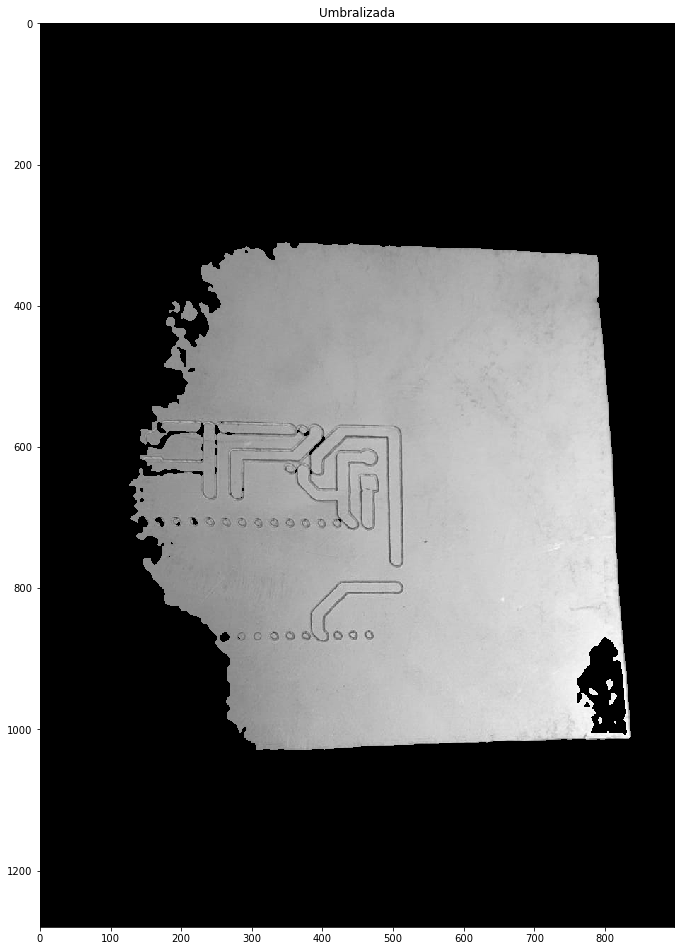

In [4]:
img2 = cv2.imread('/home/user/Documents/UN/TIA/Proyecto/PCBMillQualityControl/TestPics/PCB1.jpg',1)
img2 = cv2.imread("./TestPics/PCB18.jpeg",1)
bags_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
bags=img2
blur = cv2.blur(bags,(3,3))
blur0=cv2.medianBlur(blur,7)
blur1= cv2.GaussianBlur(blur0,(7,7),0)
blur2= cv2.bilateralFilter(blur1,3,75,75)
low_blue = np.array([135, 135, 135]) #120,60,60
high_blue = np.array([250, 250, 250]) #250.250.250
mask2 = cv2.inRange(blur2, low_blue, high_blue)
res = cv2.bitwise_and(img2,img2, mask= mask2)
plt.figure(4,figsize=(25, 25))
plt.subplot(121), plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2GRAY), cmap='gray'), plt.title('Umbralizada')

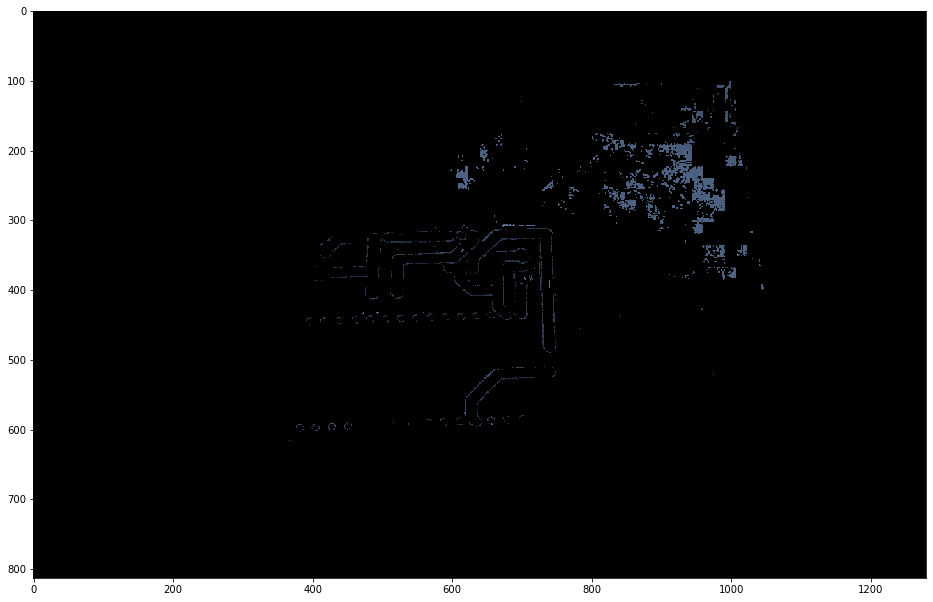

In [5]:
#Segmentacion de Color

img2 = cv2.imread("./TestPics/PCB17.jpeg",1)
bags_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
bags=img2

#refer to hue channel (in the colorbar)
lower_mask = bags_hsv[:,:,0] > 0.2#refer to hue channel (in the colorbar)
upper_mask = bags_hsv[:,:,0] < 0.1#refer to transparency channel (in the colorbar)
saturation_mask = bags_hsv[:,:,1] >100
 
#mask = upper_mask*lower_mask*saturation_mask
# saturation_mask = cv2.cvtColor(saturation_mask, cv2.COLOR_HSV2BGR)
# ret, saturation_mask = cv2.threshold(saturation_mask, 0.05 * saturation_mask.max(), 255, 0)
# mask = cv2.bitwise_not(saturation_mask)
mask = saturation_mask
red = bags[:,:,0]*mask
green = bags[:,:,1]*mask
blue = bags[:,:,2]*mask
bags_masked = np.dstack((red,green,blue))
plt.figure(3,figsize=(16, 16))
plt.imshow(bags_masked)
#plt.subplot(121), plt.imshow(th2, cmap='gray'), plt.title('Umbralizada')

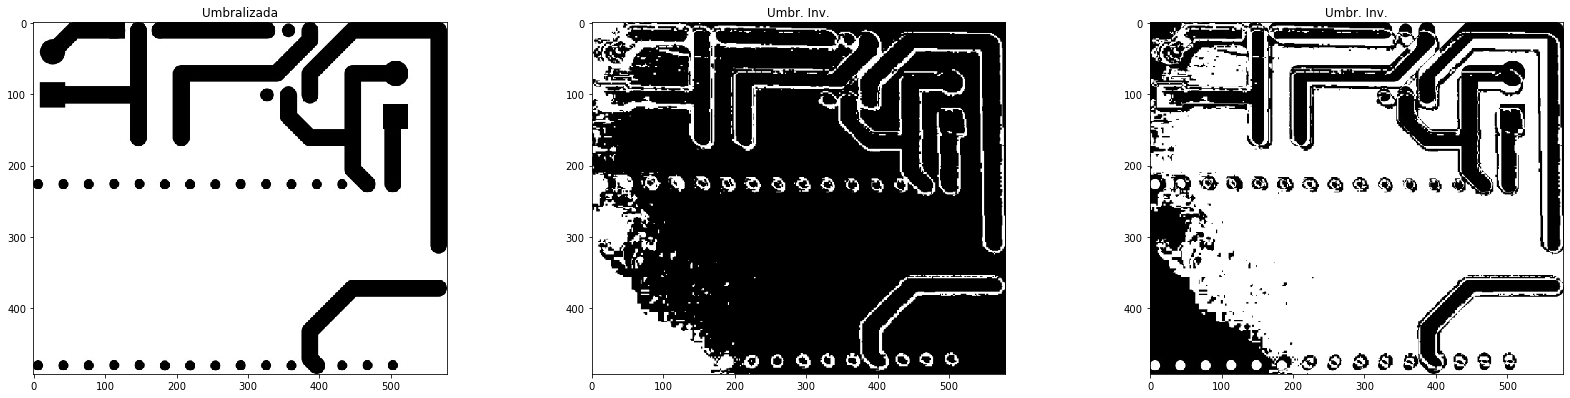

In [6]:
#Carga de validacion

imgtest = cv2.imread("./TestPics/PCB16Val.jpg",0)
#loaded_test = cv2.cvtColor(imgtest, cv2.COLOR_BGR2HSV)
imgtest=cv2.rotate(cv2.flip(imgtest, 0), cv2.ROTATE_90_COUNTERCLOCKWISE) 

#Repitiendo OTSU

img5 = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
width, height = img5.shape[:2]
img_umbral5 = np.zeros((width,height), np.uint8)
img_umbral_inv5 = np.zeros((width,height), np.uint8)

#DIVISION POR UNA CONSTANTE
C5=2#Valor de la constante
IGMax5=0
IGmin5=100000

#DIVISION POR UNA CONSTANTE
H5=140 #Valor de la constante

for i in range(width):
    for j in range(height):
        if img5[i,j] < H5: 
            img_umbral5[i,j] = 0
            img_umbral_inv5[i,j] = 255
        else : 
            img_umbral5[i,j] = 255
            img_umbral_inv5[i,j] = 0
        if img5[i,j] > IGMax5: IGMax5 = img5[i,j]
        if img5[i,j] < IGmin5: IGmin5 = img5[i,j]


cropped_image = img_umbral_inv5[560:880, 140:515]

dim = (579, 492)
  
# resize image
resized = cv2.resize(cropped_image, dim, interpolation = cv2.INTER_AREA)

#difference=cv2.bitwise_xor(imgtest,cropped_image)
difference=imgtest^resized


#Visualizacion resulatado 
plt.figure(1,figsize=(25, 25))
plt.subplot(131), plt.imshow(imgtest, cmap='gray'), plt.title('Umbralizada')
plt.subplot(132), plt.imshow(resized, cmap='gray'), plt.title('Umbr. Inv.')
plt.subplot(133), plt.imshow(difference, cmap='gray'), plt.title('Umbr. Inv.')

# Adjust the subplot layout, because the logit one may take more space
# than usual, due to labels 
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.show()

## img6 = cv2.medianBlur(img5,1)

th2 = cv2.adaptiveThreshold(img6,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,9,8)
#Gaussiano
th3 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,9,2)

nlbw = cv2.medianBlur(th2, 7)

blur = cv2.GaussianBlur(img2,(1,1),0)
ret3,th4 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(2,figsize=(25, 25))
plt.subplot(121), plt.imshow(th2, cmap='gray'), plt.title('Umbralizada')

In [7]:
imgtest.shape

(492, 579)

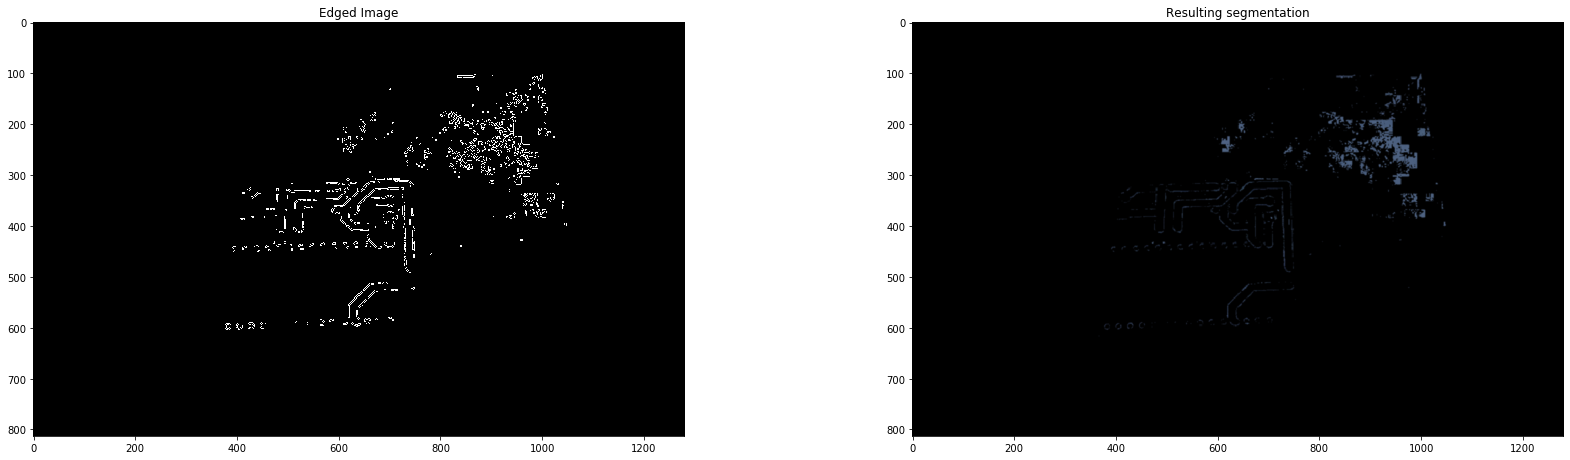

In [8]:
blur = cv2.GaussianBlur(bags_masked, (5,5), 0)
edges = cv2.Canny(blur,80,100)

#Visualizacion resulatado 
plt.figure(1,figsize=(25, 25))
plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edged Image')
plt.subplot(122), plt.imshow(blur, cmap='gray'), plt.title('Resulting segmentation')

# Adjust the subplot layout, because the logit one may take more space
# than usual, due to labels 
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.show()

In [9]:
cropped_image.shape

(320, 375)

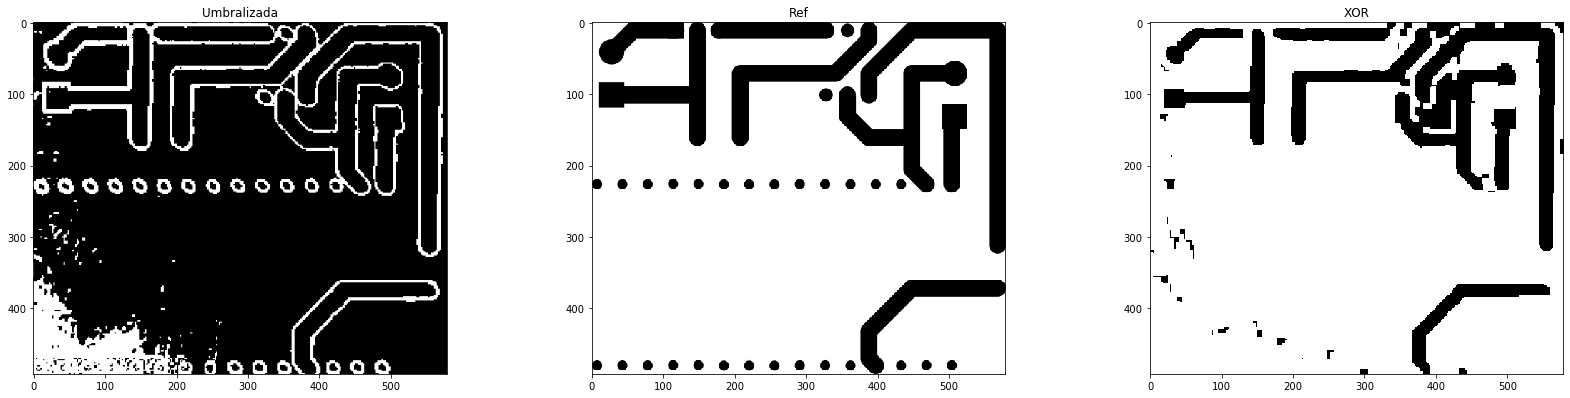

uint8
uint8


In [92]:
# UMBRALIZACION DE UNA IMAGEN

# SE CARGAN LAS IMAGENES 
imgtest = cv2.imread("./TestPics/PCB16Val.jpg",0)
#loaded_test = cv2.cvtColor(imgtest, cv2.COLOR_BGR2HSV)
imgtest=cv2.rotate(cv2.flip(imgtest, 0), cv2.ROTATE_90_COUNTERCLOCKWISE) 

img1 = cv2.rotate(cv2.imread("./TestPics/PCB16.jpeg",0), cv2.ROTATE_90_COUNTERCLOCKWISE) 


width, height = img1.shape[:2]
img_umbral = np.zeros((width,height), np.uint8)
img_umbral_inv = np.zeros((width,height), np.uint8)

#DIVISION POR UNA CONSTANTE
C=5 #Valor de la constante
IGMax=0
IGmin=1000000

#DIVISION POR UNA CONSTANTE
H=116 #Valor de la constante

for i in range(width):
    for j in range(height):
        if img1[i,j] < H : 
            img_umbral[i,j] = 0
            img_umbral_inv[i,j] = 255
        else : 
            img_umbral[i,j] = 255
            img_umbral_inv[i,j] = 0
        if img1[i,j] > IGMax: IGMax = img1[i,j]
        if img1[i,j] < IGmin: IGmin = img1[i,j]

cropped_image2 = img_umbral_inv[320:555, 330:615]

dim = (579, 492)
  
# resize image
resized = cv2.resize(cropped_image2, dim, interpolation = cv2.INTER_AREA)



open_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(resized, cv2.MORPH_OPEN, open_kernel, iterations=1)
close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
close = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, close_kernel, iterations=2)

close_kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
close2 = cv2.morphologyEx(close, cv2.MORPH_CLOSE, close_kernel, iterations=2)


#Hole filling
Ac = (255 - close2)//255

X = np.zeros(close2.shape)
X[6,10] = 1 #This pixel was identified manually as member of a hole
X[200,100] = 1
X[400,180] = 1

B = cv2.getStructuringElement(cv2.MORPH_CROSS,(7,7))

X1 = cv2.dilate(X,B)*Ac
while(np.sum(X1) != np.sum(X)):
    X = X1
    X1 = cv2.dilate(X,B)*Ac
processed_image=X1*255+close2

processed_image = cv2.erode(processed_image, None, iterations=1)
processed_image = cv2.dilate(processed_image, None, iterations=3)

processed_image = cv2.threshold(processed_image, 200, 255, cv2.THRESH_BINARY)[1]
processed_image=processed_image.astype(np.uint8)

#difference=cv2.bitwise_xor(imgtest,processed_image)
difference=(imgtest)^processed_image


contours, hierarchy = cv2.findContours(difference, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
hierarchy = hierarchy[0]

for i, c in enumerate(contours):
    if hierarchy[i][2] < 0 and hierarchy[i][3] < 0:
        cv2.drawContours(difference, contours, i, (0, 0, 255), 2)
    else:
        cv2.drawContours(difference, contours, i, (0, 255, 0), 2)
          


#Visualizacion resulatado 
plt.figure(1,figsize=(25, 25))
plt.subplot(131), plt.imshow(resized, cmap='gray'), plt.title('Umbralizada')
plt.subplot(132), plt.imshow(imgtest, cmap='gray'), plt.title('Ref')
plt.subplot(133), plt.imshow(processed_image, cmap='gray'), plt.title('XOR')



# Adjust the subplot layout, because the logit one may take more space
# than usual, due to labels 
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.show()


print(imgtest.dtype)
print(processed_image.dtype)



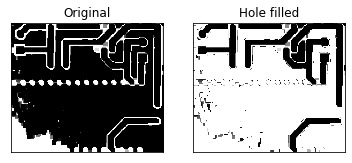

In [57]:
img = close2
ret,img_th = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)

#Boundary closing through dilation
se = np.asarray([[1,1,1]],np.uint8)
#img = cv2.dilate(close2,se)

#Hole filling
Ac = (255 - close2)//255

X = np.zeros(close2.shape)
X[6,10] = 1 #This pixel was identified manually as member of a hole
X[200,100] = 1
X[410,140] = 1

B = cv2.getStructuringElement(cv2.MORPH_CROSS,(7,7))

X1 = cv2.dilate(X,B)*Ac
while(np.sum(X1) != np.sum(X)):
    X = X1
    X1 = cv2.dilate(X,B)*Ac

#Plot
plt.figure(1)
plt.subplot(121),plt.title('Original'),plt.imshow(img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.title('Hole filled'),plt.imshow(X1*255+img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()
# print(img[6,10])